In [1]:
# Clear Jupyter notebook output and clear all variables
from IPython.display import clear_output
clear_output(wait=True)

# Remove all user-defined variables
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

# Set path to the parent directory
import sys
import os
file = "/home/ashwin/GIT/PulsarAnalyticsKit/"
sys.path.append(file)

# Import necessary modules
from core.pulsar_analysis import pulsar_analysis
from core.generic_plotting import *


In [2]:
class pulsar_analysis(pulsar_analysis):
    def template(self):
        print("Template for pulsar analysis")

In [3]:
vela_long_data = "../Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt"
pulsar = pulsar_analysis(vela_long_data, channel_names=["N", "S"], data_type='ascii',block_size=512, avg_blocks=60, sample_rate=33e6)

Given Data is of ndim : 2 . shape : 2
file_path: ../Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt
data_type: ascii
n_channels: 2
raw_data shape :  (30719999, 2)
channel_names: ['N', 'S']
block_size: 512
avg_blocks: 60
sample_rate: 33000000.0
intensity_matrix_ch_s shape :  (2,)
dedispersed_ch_s shape :  (2,)
dedispersed_choped_ch_s: [None None]
folded_ch_s: [None None]
center_freq_MHZ: 326.5
bandwidth_MHZ: 16.5
skip_rows: 1


In [4]:
percentofData = 20 # Percentage of data to analyze
n = int(pulsar.raw_data.shape[0] * percentofData / 100)

ch0 = pulsar.raw_data[:n , 0]
ch1 = pulsar.raw_data[:n, 1]
fs = pulsar.sample_rate

# compare_channels(ch0,ch1, fs, label="Comparision of N and S channels",)

In [5]:
#  Plot_characterstics(pulsar,channel=1)

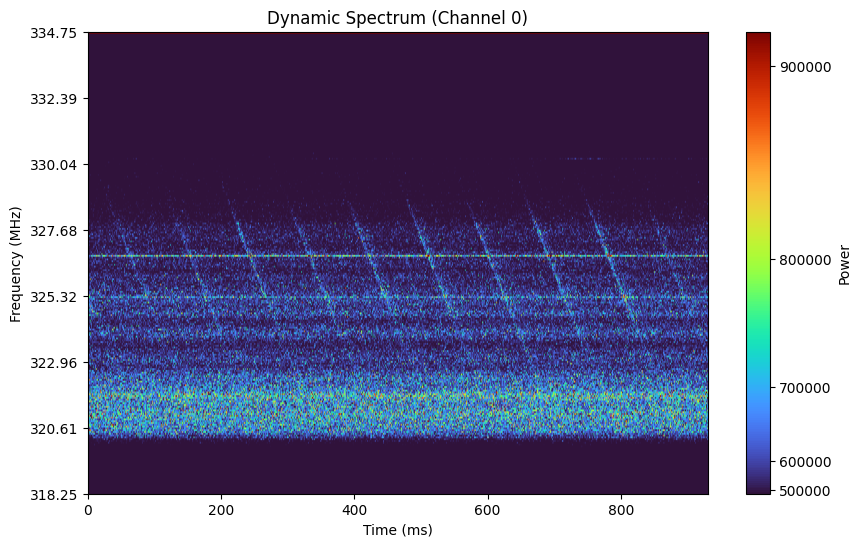

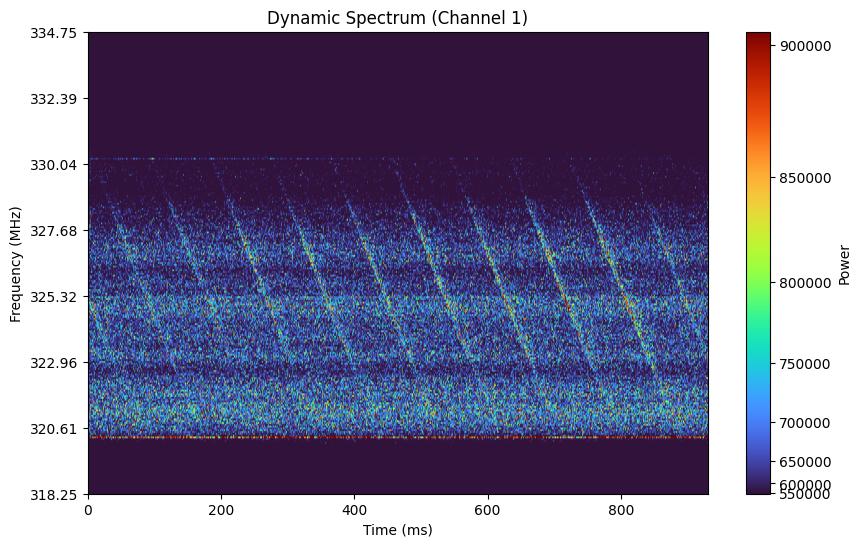

In [6]:
pulsar.compute_intensity_matrix()
plot_intensity_matrix(pulsar,channel = 0)
plot_intensity_matrix(pulsar,channel = 1)

Flagging 82 channels as RFI heavy
Flagging 79 channels as RFI heavy


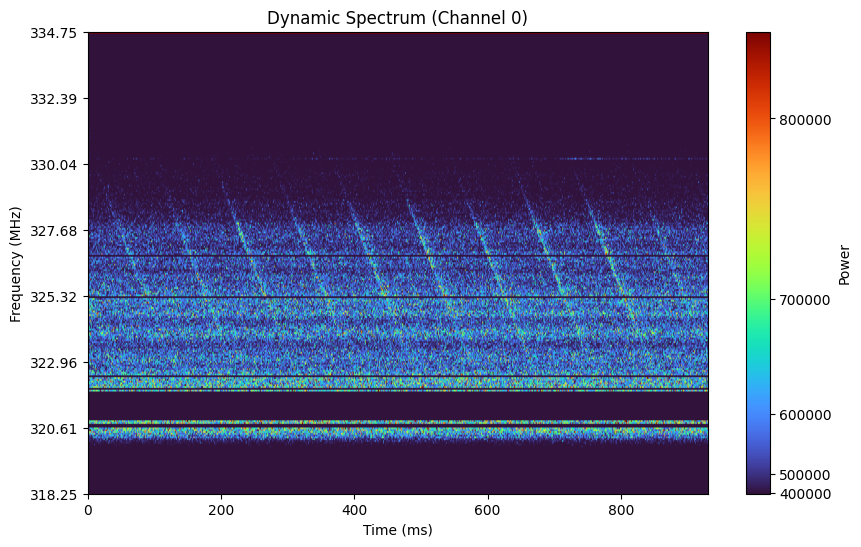

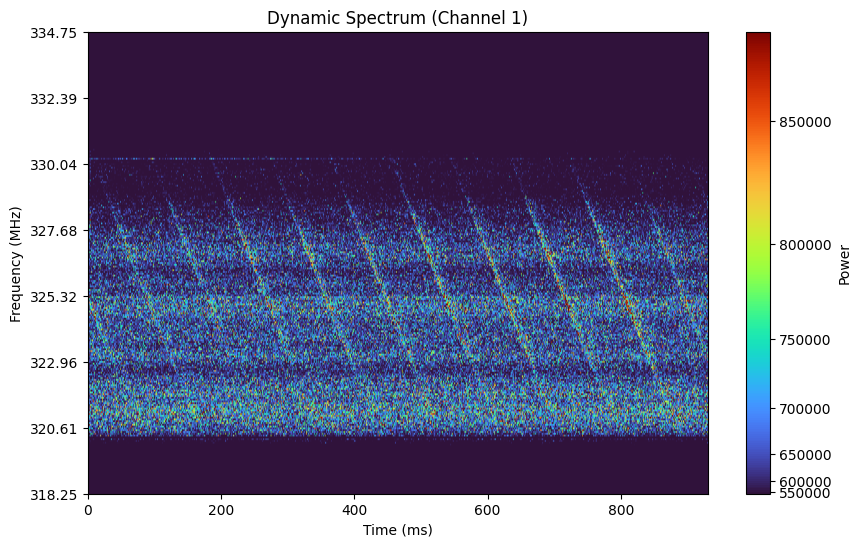

In [7]:
pulsar.RFI_mitigation(freq_ch_threshold=1,time_ch_threshold=7,fill_value=0)
plot_intensity_matrix(pulsar,channel = 0)
plot_intensity_matrix(pulsar,channel = 1)